# ***Resolución de acertijos mediante algoritmos de Machine Learning***

<img src='https://gitlab.com/luismiguelrodriguezlopez98/resolucion-de-acertijos-mediante-algoritmos-de-machine-learning/-/raw/main/Banner.png' />

# **Introducción**

El planteamiento sobre el cual se va a desarrollar el proyecto de clase es el siguiente, ¿De qué forma se pueden usar algoritmos de machine learning para la resolución de acertijos que tiene más de una forma de solucionarse tomando en cuenta las reglas de los mismos?

Partiendo de la premisa anterior se plantea un proyecto que permite utilizar diferentes tipos de algoritmos machine learning tales como: BFS, DFS y Random Forest Classifier. Y que, partiendo de condiciones ya establecidas, sean usados para construir una inteligencia artificial que sea capaz de resolver acertijos como el juego de las N reinas, y los misioneros & caníbales, de tal manera que al implementarle un numero de N pasos, genere una serie de resultados para las posibles jugadas que se podrían realizar como solución a los anteriores juegos mencionados. Siendo el objetivo principal el mostrar el estado (Ganó, Perdió, sigue jugando) en el que se encuentra el acertijo, luego de haberle aplicado uno de los métodos de búsqueda de los algoritmos mencionados anteriormente, y de esta manera comparar mediante un riguroso análisis, cual es el algoritmo más útil para la resolución de los acertijos.

# **Misioneros y caníbales**

El juego plantea un acertijo donde se tienen tres misioneros y tres caníbales del mismo lado del mapa. El propósito del juego es que el jugador debe cruzar todos los misioneros y caníbales a través del rio en una barca hacía el otro lado. Cabe resaltar que la barca no podrá cruzar el rio si está vacía, y que en la barca solo se puede llevar un máximo de dos personas y que siempre debe haber una mayoría numérica de misioneros junto a los caníbales, si esto no se cumple entonces los caníbales se comerán a los misioneros danto por terminado el juego.

# **Problemas de las “N” reinas**

El problema de las N reinas es un pasatiempo que consiste en poner N reinas en el tablero de ajedrez de dimensiones NxN. Fue propuesto por el ajedrecista alemán Max Bezzel en 1848. En el juego del ajedrez la reina amenaza a aquellas piezas que se encuentren en su misma fila, columna o diagonal. El juego de las N reinas consiste en poner sobre un tablero de ajedrez N reinas sin que estas se amenacen entre ellas.

# **Proceso y método**

Reuniendo los conocimientos obtenidos mediante la investigación de los temas tratados en el plan de estudios, y gracias a la asesoría impartida por el docente a cargo de la materia, se realizó un esquema inicial

*   *Entorno:* El proyecto se ha realizado en Colaboratory, utilizando el lenguaje de programación Python.

*   *Intervenciones:* Se implementaron los algoritmos BFS y DFS para construir un árbol de búsqueda que pueda encontrar las N soluciones para cada uno de los acertijos. Además, se utiliza el algoritmo RFC (Random Forest Classifier) de tal manera que se pueda trabajar con un dataset, donde tengamos un número de jugadas “x” para terminar el juego, “x + 1” serán nuestro número de columnas en el dataset ya que al final tendremos la clase o estado del juego (Ganó, En juego, Perdió). El número de filas será determinado por todas las posibles combinaciones de movimientos que se pueden tomar.

*   *Análisis estadístico:* El análisis a realizar está dividido para cada uno de los algoritmos utilizados, en el caso de implementar el algoritmo BFS y DFS, se compara el menor coste de tiempo que tiene cada uno de estos. En el caso del algoritmo Random Forest Classifier se busca evaluar y análizar el "accuracy" o precisión, dependiendo del número de estimadores y la profundidad implementada en la búsqueda de soluciones.


In [ ]:
#@title **Intalación de pygame**
!pip install pygame

     |████████████████████████████████| 13.8 MB 217 kB/s 


In [ ]:
#@title **Importamos librerias**
import numpy as np
import pandas as pd
import string
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.ensemble import RandomForestClassifier
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import pygame

pygame 2.0.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
#@title **Montamos google drive**
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/VersionesMyC/MyC-v0.0.5/')
os.environ["SDL_VIDEODRIVER"] = "dummy"

Mounted at /content/drive


Se crea el código para generar los estados de decisión de cada uno de los acertijos

In [ ]:
#@title **Código Misioneros y Canibales**

class Estado(object):
  """Clase que contiene todos las funciones canibales."""
  def __init__(self, paso_ant, canib_iz, mision_iz, barco_p,  barco_c,  barco_m, canib_de, mision_de):
    self.paso_ant = paso_ant
    self.canib_iz = canib_iz
    self.mision_iz = mision_iz
    self.barco_p = barco_p
    self.barco_c= barco_c
    self.barco_m = barco_m        
    self.canib_de = canib_de       
    self.mision_de = mision_de
    self.perdedor = False
    self.ganador = False
    self.Explorado = False
    self.Padre = None           
    self.Hijos = []
  def getValues(self,):
    self.comprobarGanador()
    return [self.barco_p,self.canib_iz,self.mision_iz,self.canib_de,self.mision_de,self.barco_c,self.barco_m]
  def setBarcoPosition(self, value):
    if (self.barco_m + self.barco_c ) > 0:
      self.barco_p = value
      self.comprobarPerdedor()
    else:
      return False
  def subirCanibal(self,):
    if self.barco_p == 0:
      if self.canib_iz >=1:
        if (self.barco_c+self.barco_m) <2:
          self.canib_iz = self.canib_iz -1
          self.barco_c = self.barco_c +1      
    if self.barco_p == 1:
      if self.canib_de >=1:
        if (self.barco_c+self.barco_m) <2:
          self.canib_de = self.canib_de -1
          self.barco_c = self.barco_c +1        
  def bajarCanibal(self,):
    if self.barco_p == 0:
      if self.barco_c >=1:
        self.barco_c = self.barco_c -1
        self.canib_iz = self.canib_iz +1
    if self.barco_p == 1:
      if self.barco_c >=1:
        self.barco_c = self.barco_c -1
        self.canib_de = self.canib_de +1
  def subirMisionero(self,):
    if self.barco_p == 0:
      if self.mision_iz >=1:
        if (self.barco_c+self.barco_m) <2:
          self.mision_iz = self.mision_iz -1
          self.barco_m = self.barco_m +1
    if self.barco_p == 1:
      if self.mision_de >=1:
        if (self.barco_c+self.barco_m) <2:
          self.mision_de = self.mision_de -1
          self.barco_m = self.barco_m +1
  def bajarMisionero(self,):
    if self.barco_p == 0:
      if self.barco_m >=1:
        self.barco_m = self.barco_m -1
        self.mision_iz = self.mision_iz +1
    if self.barco_p == 1:
      if self.barco_m >=1:
        self.barco_m = self.barco_m -1
        self.mision_de = self.mision_de +1
  def comprobarPerdedor(self,):
    if (self.mision_de < self.canib_de) and self.mision_de != 0:
      #print("misioneros menores que canibalez Derecha")
      self.perdedor = True
    if (self.mision_iz < self.canib_iz) and self.mision_iz !=0:
      #print("misioneros menores que canibalez Izquierda")
      self.perdedor = True
  def comprobarGanador(self,):
    if self.mision_de == 3 and self.canib_de == 3:
      self.ganador = True
  def estadojuego(self,):
    self.comprobarGanador()
    self.comprobarPerdedor()
    if self.perdedor == False and self.ganador == False:
      return "en juego"
    if self.perdedor == True:
      return "perdio"
    if self.ganador == True:
      return "gano"

  def esValido(self,u):
    #if (self.mision_de < self.canib_de and self.mision_de != 0) or ((self.mision_iz < self.canib_iz) and self.mision_iz !=0):
    # barco a la izquierda o a la dereha
    if u == "a" or u=="d":
      if (self.barco_m + self.barco_c ) > 0:
        return True

    #subir canibal
    elif u == "c":
      if self.barco_p == 0 and self.canib_iz >=1 and (self.barco_c+self.barco_m) <2:
        return True
      if self.barco_p == 1 and self.canib_de >=1 and (self.barco_c+self.barco_m) <2:
        return True

    #subir misonero
    elif u == "m":
      if self.barco_p == 0 and self.mision_iz >=1 and (self.barco_c+self.barco_m) <2:
        return True
      if self.barco_p == 1 and self.mision_de >=1 and (self.barco_c+self.barco_m) <2:
        return True

    #bajar canibal
    elif u == "x":
      if self.barco_p == 0 and self.barco_c >=1:
        return True
      
      if self.barco_p == 1 and self.barco_c >=1 :
        return True

    #bajar misionero
    elif u == "n":
      if self.barco_p == 0 and self.barco_m >=1:
        return True
      if self.barco_p == 1 and self.barco_m >=1:
        return True

    else:
      return False

  def esFinal(self):
      if self.canib_de == 3 and self.mision_de == 3 and self.perdedor == False:
        return True
      else:
        return False

  def generarHijos(self):
      #BARCO ESTÁ EN LA IZQUIERDA
      if self.barco_p == 0:
        #subir canibal          
        if self.esValido("c") and self.paso_ant != "x":
          hijo = Estado("c", self.canib_iz-1, self.mision_iz, self.barco_p,  self.barco_c+1,  self.barco_m, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #subir misionero          
        if self.esValido("m")  and self.paso_ant != "n":
          hijo = Estado("m", self.canib_iz, self.mision_iz-1, self.barco_p,  self.barco_c,  self.barco_m+1, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #bajar canibal         
        if self.esValido("x")  and self.paso_ant != "c":
          hijo = Estado("x", self.canib_iz+1, self.mision_iz, self.barco_p,  self.barco_c-1,  self.barco_m, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #bajar misionero
        if self.esValido("n")  and self.paso_ant != "m":
          hijo = Estado("n", self.canib_iz, self.mision_iz+1, self.barco_p,  self.barco_c,  self.barco_m-1, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #barco a la derecha         
        if self.esValido("d") and self.paso_ant != "a":
          hijo = Estado("d", self.canib_iz, self.mision_iz, self.barco_p+1,  self.barco_c,  self.barco_m, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

      #BARCO ESTÁ EN LA DERECHA
      elif self.barco_p == 1:
        #subir canibal            
        if self.esValido("c") and self.paso_ant != "x":
          hijo = Estado("c", self.canib_iz, self.mision_iz, self.barco_p,  self.barco_c+1,  self.barco_m, self.canib_de-1, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #subir misionero            
        if self.esValido("m") and self.paso_ant != "n":
          hijo = Estado("m", self.canib_iz, self.mision_iz, self.barco_p,  self.barco_c,  self.barco_m+1, self.canib_de, self.mision_de-1)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #bajar canibal            
        if self.esValido("x") and self.paso_ant != "c":
          hijo = Estado("x", self.canib_iz, self.mision_iz, self.barco_p,  self.barco_c-1,  self.barco_m, self.canib_de+1, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #bajar misionero            
        if self.esValido("n") and self.paso_ant != "m":
          hijo = Estado("n", self.canib_iz, self.mision_iz, self.barco_p,  self.barco_c,  self.barco_m-1, self.canib_de, self.mision_de+1)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

        #barco a la izquierda            
        if self.esValido("a") and self.paso_ant != "d":
          hijo = Estado("a", self.canib_iz, self.mision_iz, self.barco_p-1,  self.barco_c,  self.barco_m, self.canib_de, self.mision_de)
          hijo.comprobarPerdedor()
          if hijo.perdedor != True:
            self.Hijos.append(hijo)

  def obtenerRecorrido(self):
    next = self
    reporte = []
    pasos = []
    texto = ""
    while next.Padre != None:
      reporte.append(next)
      next = next.Padre
    j = 1
    for i in range(len(reporte)-1, -1, -1):
        pasos.append(reporte[i].paso_ant)

    return pasos

  def obtenerRecorrido2(self):
    next = self
    reporte = []
    texto = ""
    #Agregamos desde el ultimo elemento del camino hasta el primero
    while next.Padre != None:
      reporte.append(next)
      next = next.Padre
    j = 1
    for i in range(len(reporte)-1, -1, -1):
        texto += "Paso N°: " + str(len(reporte)-i) + "\n" \
          + "paso anterior: " + str(reporte[i].paso_ant) + "\n" \
          
    return texto


## Controles del juego Misioneros y Canibales



*   Mover barco a la derecha = d
*   Mover barco a la izquierda = a
*   Subir Misionero = m
*   Bajar Misionero = n
*   Subir Canibal = c
*   Bajar Canibal = x









In [ ]:
#@title **Código N reinas**

class Estados(object):

  def __init__(self, vector, n):
    self.tablero = []
    self.vector = vector
    self.n = n
    self.Explorado = False
    self.Padre = None 
    self.Hijos = []

    for i in range(self.n):
      self.tablero.append(['▢'] * self.n)

    if len(self.vector) <= self.n:
      for j in range(len(vector)):
        self.tablero[vector[j][0]][vector[j][1]] = 'R'

  def mtablero(self):
    for row in self.tablero:
      print(*row)

  def generarHijos(self):
    sig = len(self.vector)
    if sig < self.n:
      for i in range(self.n):
        s = [sig,i]
        vec = []
        for v in range(len(self.vector)):
          vec.append(self.vector[v])
        vec.append(s)
        hijo = Estados(vec,self.n)
        self.Hijos.append(hijo)
  
  def esFinal(self):
    if self.nocolicion():
      if len(self.vector) == self.n:
        return True
    
    return False

  def Final(self):
    if len(self.vector) == self.n:
      return True
    
    return False

  def nocolicion(self):
    for i in range(len(self.vector)):
      row = self.vector[i][0]
      col = self.vector[i][1]

      for i in range(self.n):
        if self.tablero[row][i] == 'R' and i != col:
          return False

      for i in range(self.n):
        if self.tablero[i][col] == 'R' and i != row:
          return False

      for r in range(self.n):
        c = r + (col-row)
        if c>=0 and c<=self.n-1:
          if self.tablero[r][c] == 'R' and r != row and c != col:
            return False

      for r in range(self.n):
        c = -r + (col+row)
        if c>=0 and c<=self.n-1:
          if self.tablero[r][c] == 'R' and r != row and c != col:
            return False
  
    return True

# **BFS y DFS**

# *Acertijo Misioneros y Canibales*

Usamos el algoritmo BFS y DFS para hallar una solución al acertijo de misioneros y canibales

In [ ]:
#@title **Algoritmo de busqueda con BFS**
class BFS(object):
    
    def anchuraPrimero(self, estadoIncial):
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.popleft()
            #Encontrar el Estado Final
            if actual.esFinal():
                return actual
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

estado = Estado("v",3,3,0,0,0,0,0)#Creando Estado Inicial
start_time = time.time()
bfs = BFS()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición
print("Tiempo de ejecución: %s segundos" % (np.round(time.time() - start_time,7)))

print(estadoFinal.obtenerRecorrido2())

recorridoBFS = estadoFinal.obtenerRecorrido()

Tiempo de ejecución: 0.1720591 segundos
Paso N°: 1
paso anterior: c
Paso N°: 2
paso anterior: c
Paso N°: 3
paso anterior: d
Paso N°: 4
paso anterior: x
Paso N°: 5
paso anterior: a
Paso N°: 6
paso anterior: m
Paso N°: 7
paso anterior: d
Paso N°: 8
paso anterior: n
Paso N°: 9
paso anterior: a
Paso N°: 10
paso anterior: m
Paso N°: 11
paso anterior: d
Paso N°: 12
paso anterior: n
Paso N°: 13
paso anterior: a
Paso N°: 14
paso anterior: c
Paso N°: 15
paso anterior: d
Paso N°: 16
paso anterior: x
Paso N°: 17
paso anterior: a
Paso N°: 18
paso anterior: m
Paso N°: 19
paso anterior: d
Paso N°: 20
paso anterior: n
Paso N°: 21
paso anterior: x



In [ ]:
#@title **Algoritmo de busqueda con DFS**
class DFS(object):
  def __init__(self):
    self.actual = None
    self.max = 21

  def dfs(self, estado, tiempo):
    tiempo = tiempo+1
    #estado.generarHijos()
    if estado.esFinal() or tiempo >= 21:
      self.actual = estado
    else:
      estado.generarHijos()
      if len(estado.Hijos) > 0 :
        for hijo in estado.Hijos:
          if (not hijo.Explorado) and tiempo < 21:
            hijo.Explorado = True
            hijo.Padre = estado
            self.dfs(hijo, tiempo)
      if len(estado.Hijos) == 0 or tiempo >= 21:
        padre = estado.Padre
        padre.Hijos.remove(estado)
        del estado
        
  def profundidadPrimero(self, estado):     
    tiempo = 0
    if estado.esFinal():
      self.actual = estado
    else:
      estado.generarHijos()
      if len(estado.Hijos) > 0:
        for hijo in estado.Hijos:
          if not hijo.Explorado:
            hijo.Explorado = True
            hijo.Padre = estado
            self.dfs(hijo, tiempo)

estado = Estado("v",3,3,0,0,0,0,0)#Creando Estado Inicial
start_time = time.time()
dfs = DFS()#Instanciando la clase
dfs.profundidadPrimero(estado)#Obteniendo la Solición
estadoFinal = dfs.actual
print("Tiempo de ejecución: %s segundos" % (np.round(time.time() - start_time,7)))

print(estadoFinal.obtenerRecorrido2())

recorridoDFS = estadoFinal.obtenerRecorrido()

Tiempo de ejecución: 0.2068179 segundos
Paso N°: 1
paso anterior: c
Paso N°: 2
paso anterior: m
Paso N°: 3
paso anterior: d
Paso N°: 4
paso anterior: n
Paso N°: 5
paso anterior: a
Paso N°: 6
paso anterior: c
Paso N°: 7
paso anterior: d
Paso N°: 8
paso anterior: x
Paso N°: 9
paso anterior: m
Paso N°: 10
paso anterior: a
Paso N°: 11
paso anterior: n
Paso N°: 12
paso anterior: d
Paso N°: 13
paso anterior: c
Paso N°: 14
paso anterior: a
Paso N°: 15
paso anterior: x
Paso N°: 16
paso anterior: m
Paso N°: 17
paso anterior: d
Paso N°: 18
paso anterior: n
Paso N°: 19
paso anterior: a
Paso N°: 20
paso anterior: c
Paso N°: 21
paso anterior: d



[1, 0, 0, 3, 3, 0, 0]
False


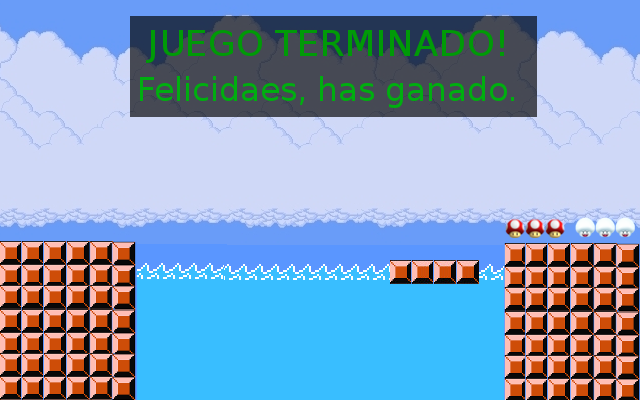

In [ ]:
#@title **Juego Misioneros y canibales**

#@markdown El "camino" puede ser recorrido por el "recorridoBFS" o "recorridoDFS".

class Canibal(object):
  """Clase que contiene todos las funciones canibales."""
  def __init__(self):
    #Variables globales
    self.barco_p = 0
    self.barco_c= 0
    self.barco_m = 0
    self.canib_iz = 3
    self.canib_de = 0
    self.mision_iz = 3
    self.mision_de = 0
    self.perdedor = False
    self.ganador = False
  def getValues(self,):
    self.comprobarGanador()
    return [self.barco_p,self.canib_iz,self.mision_iz,self.canib_de,self.mision_de,self.barco_c,self.barco_m]
  def setBarcoPosition(self, value):
    if (self.barco_m + self.barco_c ) > 0:
      self.barco_p = value
      self.comprobarPerdedor()
    else:
      return False
  def subirCanibal(self,):
    if self.barco_p == 0:
      if self.canib_iz >=1:
        if (self.barco_c+self.barco_m) <2:
          self.canib_iz = self.canib_iz -1
          self.barco_c = self.barco_c +1      
    if self.barco_p == 1:
      if self.canib_de >=1:
        if (self.barco_c+self.barco_m) <2:
          self.canib_de = self.canib_de -1
          self.barco_c = self.barco_c +1        
  def bajarCanibal(self,):
    if self.barco_p == 0:
      if self.barco_c >=1:
        self.barco_c = self.barco_c -1
        self.canib_iz = self.canib_iz +1
    if self.barco_p == 1:
      if self.barco_c >=1:
        self.barco_c = self.barco_c -1
        self.canib_de = self.canib_de +1
  def subirMisionero(self,):
    if self.barco_p == 0:
      if self.mision_iz >=1:
        if (self.barco_c+self.barco_m) <2:
          self.mision_iz = self.mision_iz -1
          self.barco_m = self.barco_m +1
    if self.barco_p == 1:
      if self.mision_de >=1:
        if (self.barco_c+self.barco_m) <2:
          self.mision_de = self.mision_de -1
          self.barco_m = self.barco_m +1
  def bajarMisionero(self,):
    if self.barco_p == 0:
      if self.barco_m >=1:
        self.barco_m = self.barco_m -1
        self.mision_iz = self.mision_iz +1
    if self.barco_p == 1:
      if self.barco_m >=1:
        self.barco_m = self.barco_m -1
        self.mision_de = self.mision_de +1
  def comprobarPerdedor(self,):
    if (self.mision_de < self.canib_de) and self.mision_de != 0:
      print("misioneros menores que canibalez Derecha")
      self.perdedor = True
    if (self.mision_iz < self.canib_iz) and self.mision_iz !=0:
      print("misioneros menores que canibalez Izquierda")
      self.perdedor = True
  def comprobarGanador(self,):
    if self.mision_de == 3 and self.canib_de == 3:
      self.ganador = True



pygame.init()

#is_blue = True
SCREEN_WIDTH = 640
SCREEN_HEIGHT = 400

PERSONAJES_T = 20

MISIONEROS_L = 70
MISIONEROS_R = 505
MISIONEROS_V = 218

CANIBALES_L = 1
CANIBALES_R = 575
CANIBALES_V = 217

PERSONAJE_BL = 183
PERSONAJE_BR = 413
PERSONAJE_BV = 237

running = True

CAN = Canibal()

done = False

itera = 0

camino = recorridoBFS#@param

#while not done:
for nada in range(len(camino)+1):
        for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        done = True
        screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        #pygame.display.set_caption("Misioneros y Canibales")
        
        #canibal = pygame.image.load("C1.png").convert_alpha()
        #misionero = pygame.image.load("M1.png").convert_alpha()
        fondo = pygame.image.load("resource/fondo.jpg").convert()
        fondop = pygame.image.load("resource/perdedor.png").convert()
        fondog = pygame.image.load("resource/ganador.png").convert()
        barco = pygame.image.load("resource/barco.jpg").convert()
        misionero = pygame.image.load("resource/misionero.png").convert_alpha()
        canibal = pygame.image.load("resource/canibal.png").convert_alpha()

        #Canibales
        screen.blit(canibal, (CANIBALES_L, CANIBALES_V))
        screen.blit(canibal, (CANIBALES_L+PERSONAJES_T, CANIBALES_V))
        screen.blit(canibal, (CANIBALES_L+PERSONAJES_T+PERSONAJES_T, CANIBALES_V))
	
	      #Misioneros
        screen.blit(misionero, (MISIONEROS_L, MISIONEROS_V))
        screen.blit(misionero, (MISIONEROS_L+PERSONAJES_T, MISIONEROS_V))
        screen.blit(misionero, (MISIONEROS_L+PERSONAJES_T+PERSONAJES_T, MISIONEROS_V))

        tmp_pos = 0

        pygame.display.flip()
        #  [self.barco_p,self.canib_iz,self.mision_iz,self.mision_de,self.canib_de,self.barco_c,self.barco_m]
        

        datos = CAN.getValues()
        print(datos)
        print(CAN.perdedor)
        if CAN.perdedor == True:
          screen.blit(fondop,(0, 0))
        elif CAN.ganador == True:
          screen.blit(fondog,(0, 0))
        else:
          screen.blit(fondo, (0, 0))
        if datos[0] ==0:
          screen.blit(barco, (160, 260)) # Barco en la izquierda
        else:
          screen.blit(barco, (390, 260)) # Barco en la derecha
        ## MOSTRAR PERSONAJES DEL LADO IZQUIERDO
        for i in range(datos[1]):
          screen.blit(canibal, (CANIBALES_L+(PERSONAJES_T)*i, CANIBALES_V))
        for i in range(datos[2]):
          screen.blit(misionero, (MISIONEROS_L+(PERSONAJES_T)*i, MISIONEROS_V))
        ## MOSTRAR PERSONAJES DEL LADO DERECHO
        for i in range(datos[3]):
          #Mostrar Canibales en la izquierda
          screen.blit(canibal, (CANIBALES_R+(PERSONAJES_T)*i, CANIBALES_V))
        for i in range(datos[4]):
          screen.blit(misionero, (MISIONEROS_R+(PERSONAJES_T)*i, MISIONEROS_V))
        ## MOSTRAR PERSONAJES EN EL BARCO 
        if datos[0] == 0:
          tmp_count = 0
          for i in range(datos[5]):
            #Mostrar Canibales en la izquierda
            screen.blit(canibal, (PERSONAJE_BL+(PERSONAJES_T)*i, PERSONAJE_BV))
            tmp_count = tmp_count +1
          for i in range(datos[6]):
            #Mostrar Canibales en la izquierda
            screen.blit(misionero, (PERSONAJE_BL+(tmp_count)*21+(PERSONAJES_T)*i, PERSONAJE_BV))
        else:
          tmp_count = 0
          for i in range(datos[5]):
            #Mostrar Canibales en la izquierda
            screen.blit(canibal, (PERSONAJE_BR+(PERSONAJES_T)*i, PERSONAJE_BV))
            tmp_count = tmp_count +1
          for i in range(datos[6]):
            #Mostrar Canibales en la izquierda
            screen.blit(misionero, (PERSONAJE_BR+(tmp_count)*21+(PERSONAJES_T)*i, PERSONAJE_BV))
			


        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(screen)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell every 0.5 seconds
        cv2_imshow(img_bgr)
        time.sleep(1)
        if nada < len(camino):
          u = camino[itera]
          itera=itera+1
          #v = int(input())
          if u == "a":
            CAN.setBarcoPosition(0)
            print("baraco a la izquierda")
          elif u == "d":
            CAN.setBarcoPosition(1)
            print("baraco a la derecha")
          elif u == 'c':
            CAN.subirCanibal()
            print("subir un canibal")
          elif u == 'x':
            CAN.bajarCanibal()
          elif u == 'm':
            CAN.subirMisionero()
          elif u == 'n':
            CAN.bajarMisionero()
        
          output.clear()

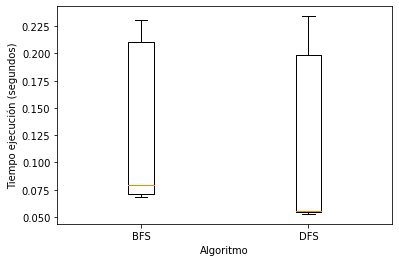

BFS
     Máximo 0.23031
     Media 0.1333
     Mediana 0.07918
     Mínimo 0.06835
DFS
     Máximo 0.23407
     Media 0.09776
     Mediana 0.05579
     Mínimo 0.05284


In [ ]:
#@title **Análisis tiempo de ejecución**

time_bfs = []
time_dfs = []
for i in range(100):
  estado = Estado("v",3,3,0,0,0,0,0)#Creando Estado Inicial
  start_time = time.time()
  bfs = BFS()#Instanciando la clase
  estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición
  time_bfs.append(np.round(time.time() - start_time,7))

  estado = Estado("v",3,3,0,0,0,0,0)#Creando Estado Inicial
  start_time = time.time()
  dfs = DFS()#Instanciando la clase
  dfs.profundidadPrimero(estado)#Obteniendo la Solición
  estadoFinal = dfs.actual
  time_dfs.append(np.round(time.time() - start_time,7))

plt.boxplot(x=[time_bfs, time_dfs])
plt.xticks([1, 2], ['BFS', 'DFS'])
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo ejecución (segundos)')
plt.show()

print('BFS')
print('     Máximo', np.round(np.max(time_bfs),5))
print('     Media', np.round(np.mean(time_bfs),5))
print('     Mediana', np.round(np.median(time_bfs),5))
print('     Mínimo', np.round(np.min(time_bfs),5))

print('DFS')
print('     Máximo', np.round(np.max(time_dfs),5))
print('     Media', np.round(np.mean(time_dfs),5))
print('     Mediana', np.round(np.median(time_dfs),5))
print('     Mínimo', np.round(np.min(time_dfs),5))

# *Acertijo N reinas*

Usamos el algoritmo BFS y DFS para hallar una solución al acertijo de N reinas

In [ ]:
#@title **Algoritmo de busqueda con BFS**
class BFS(object):
    
    def anchuraPrimero(self, estadoIncial):
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.popleft()
            #Encontrar el Estado Final
            if actual.esFinal():
                return actual
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

vector = []
t = 5 #@param
estado = Estados(vector,t)
start_time = time.time()
bfs = BFS()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición
print("Tiempo de ejecución: %s segundos" % (np.round(time.time() - start_time,7)))

print(estadoFinal.mtablero())

Tiempo de ejecución: 0.1786339 segundos
R ▢ ▢ ▢ ▢
▢ ▢ R ▢ ▢
▢ ▢ ▢ ▢ R
▢ R ▢ ▢ ▢
▢ ▢ ▢ R ▢
None


In [ ]:
#@title **Algoritmo de busqueda con DFS**
class DFS(object):
    
    def anchuraPrimero(self, estadoIncial):
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.pop()
            #Encontrar el Estado Final
            if actual.esFinal():
                return actual
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

vector = []
t = 5 #@param
estado = Estados(vector,t)
start_time = time.time()
dfs = DFS()#Instanciando la clase
estadoFinal = dfs.anchuraPrimero(estado)#Obteniendo la Solición
print("Tiempo de ejecución: %s segundos" % (np.round(time.time() - start_time,7)))

print(estadoFinal.mtablero())

Tiempo de ejecución: 0.0056217 segundos
▢ ▢ ▢ ▢ R
▢ ▢ R ▢ ▢
R ▢ ▢ ▢ ▢
▢ ▢ ▢ R ▢
▢ R ▢ ▢ ▢
None


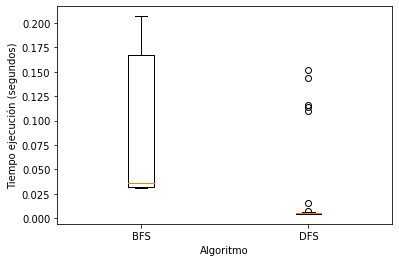

BFS
     Máximo 0.20681
     Media 0.09533
     Mediana 0.03644
     Mínimo 0.03114
DFS
     Máximo 0.15133
     Media 0.01138
     Mediana 0.00527
     Mínimo 0.00446


In [ ]:
#@title **Análisis tiempo de ejecución**

time_bfs = []
time_dfs = []
for i in range(100):
  vector = []
  estado = Estados(vector,5)
  start_time = time.time()
  bfs = BFS()#Instanciando la clase
  estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición
  time_bfs.append(np.round(time.time() - start_time,7))

  vector = []
  estado = Estados(vector,5)
  start_time = time.time()
  dfs = DFS()#Instanciando la clase
  estadoFinal = dfs.anchuraPrimero(estado)#Obteniendo la Solición
  time_dfs.append(np.round(time.time() - start_time,7))

plt.boxplot(x=[time_bfs, time_dfs])
plt.xticks([1, 2], ['BFS', 'DFS'])
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo ejecución (segundos)')
plt.show()

print('BFS')
print('     Máximo', np.round(np.max(time_bfs),5))
print('     Media', np.round(np.mean(time_bfs),5))
print('     Mediana', np.round(np.median(time_bfs),5))
print('     Mínimo', np.round(np.min(time_bfs),5))

print('DFS')
print('     Máximo', np.round(np.max(time_dfs),5))
print('     Media', np.round(np.mean(time_dfs),5))
print('     Mediana', np.round(np.median(time_dfs),5))
print('     Mínimo', np.round(np.min(time_dfs),5))

# **Random Forest Classifier**

# *Acertijo Misioneros y Canibales*

Psos 1: se generan registros aleatorios y se evalua si corresponden a "en juego", "perdio" o "gano"

In [ ]:
#@title **Código Paso 1**
datos = []

for i in range(600):

  running = True
  CAN = Estado("v",3,3,0,0,0,0,0)

  pasos = []

  for i in range(30):
    while True:
      a = random.choice("adcxnm")
      if CAN.esValido(a):
        break
      
    if not CAN.ganador and not CAN.perdedor and CAN:
      u = a
      pasos.append(u)
    else:
      u = "NN"
      pasos.append(u)
   
    if u == "a":
      CAN.setBarcoPosition(0)
      #print("baraco a la izquierda")
    elif u == "d":
      CAN.setBarcoPosition(1)
      #print("baraco a la derecha")
    elif u == 'c':
      CAN.subirCanibal()
      #print("subir un canibal")
    elif u == 'x':
      CAN.bajarCanibal()
      #print("bajar un canibal")
    elif u == 'm':
      CAN.subirMisionero()
      #print("subir un misionero")
    elif u == 'n':
      CAN.bajarMisionero()
      #print("bajar un misionero")

    CAN.comprobarGanador()

  pasos.append(CAN.estadojuego()) 
  datos.append(pasos)



Debido a que los registros aleatorios generan no ninguna secuencia de pasos ganadora, se necesita agregar datos ganadores.

Paso 2: se aplica BFS para encontrar 100 secuencias de pasos ganadoras

In [ ]:
#@title **Código Paso 2**

class BFS(object):
    
    def anchuraPrimero(self, estadoIncial):
        delta = []
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.popleft()
            #Encontrar el Estado Final
            if actual.esFinal():
                delta.append(actual)
            if len(delta) >= 150:
              return delta
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

estado = Estado("v",3,3,0,0,0,0,0)#Creando Estado Inicial
bfs = BFS()#Instanciando la clase

estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición

control = []

for i in range(len(estadoFinal)):
  control.append(estadoFinal[i].obtenerRecorrido())

datos2 = []

for i in range(len(control)):

  running = True
  CAN = Estado("v",3,3,0,0,0,0,0)

  pasos = []

  for j in range(30):

    if not CAN.ganador and not CAN.perdedor:
      u = control[i][j]
      pasos.append(u)
    else:
      u = "NN"
      pasos.append(u)
   
    if u == "a":
      CAN.setBarcoPosition(0)
    elif u == "d":
      CAN.setBarcoPosition(1)
    elif u == 'c':
      CAN.subirCanibal()
    elif u == 'x':
      CAN.bajarCanibal()
    elif u == 'm':
      CAN.subirMisionero()
    elif u == 'n':
      CAN.bajarMisionero()

    CAN.comprobarGanador()

  pasos.append(CAN.estadojuego()) 
  datos2.append(pasos)

Paso 3: unimos los registros aleatorios con los registros ganadores y creamos un dataset

In [ ]:
#@title **Código Paso 3**
for i in range(len(datos2)):
  datos.append(datos2[i])

df = pd.DataFrame(datos)
df = df.drop_duplicates()
df.head(-10)

0  1  2  3   4   5   6   7   8   ...  22  23  24  25  26  27  28  29        30
0    c  a  m  n   d   d   d   a   a  ...  NN  NN  NN  NN  NN  NN  NN  NN    perdio
1    c  m  a  d   x   a   d   c   n  ...  NN  NN  NN  NN  NN  NN  NN  NN    perdio
2    c  x  m  d  NN  NN  NN  NN  NN  ...  NN  NN  NN  NN  NN  NN  NN  NN    perdio
3    c  m  n  a   c   x   c   a   d  ...  NN  NN  NN  NN  NN  NN  NN  NN    perdio
4    c  a  c  a   d   x   d   x   c  ...   d   a   m   a   d   d   d   n  en juego
..  .. .. .. ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..       ...
735  c  m  d  x   n   c   a   c   d  ...   c   m   d   n   x  NN  NN  NN      gano
736  c  m  d  x   a   c   n   x   m  ...   m   c   d   n   x  NN  NN  NN      gano
737  c  m  d  x   a   c   n   x   m  ...   a   c   d   x   x  NN  NN  NN      gano
738  c  m  d  x   a   c   n   x   m  ...   c   m   d   n   x  NN  NN  NN      gano
739  c  m  d  x   a   c   n   x   m  ...   a   c   d   n   x  NN  NN  NN      gano

[546 rows x 31 columns]

Paso 4: realizamos una permutación a los datos.

In [ ]:
#@title **Código Paso 4**
df_t = df.replace({"NN": 0, "a": 1, "d": 2, "c": 3, "x": 4, "m": 5, "n": 6}) #Transfomración de variables
df_t.head(-10)

0   1   2   3   4   5   6   7   ...  23  24  25  26  27  28  29        30
0     3   1   5   6   2   2   2   1  ...   0   0   0   0   0   0   0    perdio
1     3   5   1   2   4   1   2   3  ...   0   0   0   0   0   0   0    perdio
2     3   4   5   2   0   0   0   0  ...   0   0   0   0   0   0   0    perdio
3     3   5   6   1   3   4   3   1  ...   0   0   0   0   0   0   0    perdio
4     3   1   3   1   2   4   2   4  ...   1   5   1   2   2   2   6  en juego
..   ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..       ...
735   3   5   2   4   6   3   1   3  ...   5   2   6   4   0   0   0      gano
736   3   5   2   4   1   3   6   4  ...   3   2   6   4   0   0   0      gano
737   3   5   2   4   1   3   6   4  ...   3   2   4   4   0   0   0      gano
738   3   5   2   4   1   3   6   4  ...   5   2   6   4   0   0   0      gano
739   3   5   2   4   1   3   6   4  ...   3   2   6   4   0   0   0      gano

[546 rows x 31 columns]

Paso 5: Asignamos los datos de entrenamiento 80% y prueba 20% 

In [ ]:
#@title **Código Paso 5**
df_t_values = np.random.permutation(df_t.values) #Permutación
x_train = df_t_values[:int(df_t_values.shape[0]*0.8),:-1] #Definición de datos de enternamiento y prueba, 80% para entrenamiento y 20% para prueba
y_train = df_t_values[:int(df_t_values.shape[0]*0.8),-1]
x_test= df_t_values[int(df_t_values.shape[0]*0.8):,:-1]
y_test = df_t_values[int(df_t_values.shape[0]*0.8):,-1]

Paso 6: Realizamos el entrenamiento usando el algoritmo Random Forest Classifier, realizando una variación en el número de estimadores "n_estimators" y en la máxima profundidad "max_depth", para cada uno calculamos el accuracy

In [ ]:
#@title **Código Paso 6**
scores_ne = []
scores_d = []

for i in range(1,11):
    est_ne = RandomForestClassifier(n_estimators=i, max_depth=10, criterion="entropy") # accuracy probando diferente numero de estimadores
    est_ne.fit(x_train,y_train)
    scores_ne.append(est_ne.score(x_test,y_test)) 

    est_d = RandomForestClassifier(n_estimators=10, max_depth=i, criterion="entropy") # accuracy probando diferente numero de max depth
    est_d.fit(x_train,y_train)
    scores_d.append(est_d.score(x_test,y_test)) 

Paso 7: graficamos el comportamiento del accuracy respecto a cada valor de N

Text(0.5, 1.0, 'RandomForest')

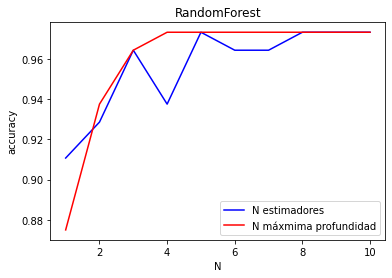

In [ ]:
#@title **Código Paso 7**
plt.plot(range(1,11), scores_ne, color="blue") # comparación entre variar los estimadores y el max depth
plt.plot(range(1,11), scores_d, color="red")
plt.legend(['N estimadores','N máxmima profundidad'])
plt.xlabel("N");plt.ylabel("accuracy")
plt.title("RandomForest")

# *Acertijo N reinas*

Paso 1: se generan los registros donde el resultado es "perdedor"

In [ ]:
#@title **Código Paso 1**

class BFS1(object):
    
    def anchuraPrimero(self, estadoIncial):
        delta = []
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.popleft()
            #Encontrar el Estado Final
            if actual.Final():
                delta.append(actual)
            if len(delta) >= 200:
              return delta
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

vector = []
t =  7#@param
estado = Estados(vector,t)

bfs = BFS1()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición

datos1 = []

for i in estadoFinal:
  pasos = []
  for j in i.vector:
    pasos.append(j[0])
    pasos.append(j[1])

  if i.esFinal():
    resultado = "ganador"
  else:
    resultado = "perdedor"

  pasos.append(resultado)
  datos1.append(pasos)



Paso 2: se generan los registros donde el resultado es "ganador"

In [ ]:
#@title **Código Paso 2**

class BFS2(object):
    
    def anchuraPrimero(self, estadoIncial):
        delta = []
        cola = deque()
        #Agregar estado Inicial a la cola
        cola.append(estadoIncial)
        #Mientras existan elementos donde buscar
        while len(cola)>0:
            #Eliminar el elemento pero almacenarlo en actual
            actual = cola.popleft()
            #Encontrar el Estado Final
            if actual.esFinal():
                delta.append(actual)
            if len(delta) >= 40:
              return delta
            #Generar Posibles Caminos    
            actual.generarHijos()
            for i in actual.Hijos:
                if not i.Explorado:
                    i.Estado = True # MARCAR COMO EXPLORADO
                    i.Padre = actual # INDICAR PADRE
                    cola.append(i) # AGREGAR EL HIJO AL QUEUE
        return None

vector = []
t =  7#@param
estado = Estados(vector,t)

bfs = BFS2()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición


datos2 = []

for i in estadoFinal:
  pasos = []
  for j in i.vector:
    pasos.append(j[0])
    pasos.append(j[1])

  if i.esFinal():
    resultado = "ganador"
  else:
    resultado = "perdedor"

  pasos.append(resultado)
  datos2.append(pasos)


Paso 3: combinamos ambos registros para generar el dataset

In [ ]:
#@title **Código Paso 3**

for i in range(len(datos2)):
  datos1.append(datos2[i])

df = pd.DataFrame(datos1)
df = df.drop_duplicates()
df.head(20)
df.tail(50)

0   1   2   3   4   5   6   7   8   9   10  11  12  13        14
190   0   0   1   0   2   0   3   0   4   3   5   6   6   1  perdedor
191   0   0   1   0   2   0   3   0   4   3   5   6   6   2  perdedor
192   0   0   1   0   2   0   3   0   4   3   5   6   6   3  perdedor
193   0   0   1   0   2   0   3   0   4   3   5   6   6   4  perdedor
194   0   0   1   0   2   0   3   0   4   3   5   6   6   5  perdedor
195   0   0   1   0   2   0   3   0   4   3   5   6   6   6  perdedor
196   0   0   1   0   2   0   3   0   4   4   5   0   6   0  perdedor
197   0   0   1   0   2   0   3   0   4   4   5   0   6   1  perdedor
198   0   0   1   0   2   0   3   0   4   4   5   0   6   2  perdedor
199   0   0   1   0   2   0   3   0   4   4   5   0   6   3  perdedor
200   0   0   1   2   2   4   3   6   4   1   5   3   6   5   ganador
201   0   0   1   3   2   6   3   2   4   5   5   1   6   4   ganador
202   0   0   1   4   2   1   3   5   4   2   5   6   6   3   ganador
203   0   0   1   5   2   3   3   1   4   6   5   4   6   2   ganador
204   0   1   1   3   2   0   3   6   4   4   5   2   6   5   ganador
205   0   1   1   3   2   5   3   0   4   2   5   4   6   6   ganador
206   0   1   1   4   2   0   3   3   4   6   5   2   6   5   ganador
207   0   1   1   4   2   2   3   0   4   6   5   3   6   5   ganador
208   0   1   1   4   2   6   3   3   4   0   5   2   6   5   ganador
209   0   1   1   5   2   2   3   6   4   3   5   0   6   4   ganador
210   0   1   1   6   2   4   3   2   4   0   5   5   6   3   ganador
211   0   2   1   0   2   5   3   1   4   4   5   6   6   3   ganador
212   0   2   1   0   2   5   3   3   4   1   5   6   6   4   ganador
213   0   2   1   4   2   6   3   1   4   3   5   5   6   0   ganador
214   0   2   1   5   2   1   3   4   4   0   5   3   6   6   ganador
215   0   2   1   6   2   1   3   3   4   5   5   0   6   4   ganador
216   0   2   1   6   2   3   3   0   4   4   5   1   6   5   ganador
217   0   3   1   0   2   2   3   5   4   1   5   6   6   4   ganador
218   0   3   1   0   2   4   3   1   4   5   5   2   6   6   ganador
219   0   3   1   1   2   6   3   4   4   2   5   0   6   5   ganador
220   0   3   1   5   2   0   3   2   4   4   5   6   6   1   ganador
221   0   3   1   6   2   2   3   5   4   1   5   4   6   0   ganador
222   0   3   1   6   2   4   3   1   4   5   5   0   6   2   ganador
223   0   4   1   0   2   3   3   6   4   2   5   5   6   1   ganador
224   0   4   1   0   2   5   3   3   4   1   5   6   6   2   ganador
225   0   4   1   1   2   5   3   2   4   6   5   3   6   0   ganador
226   0   4   1   2   2   0   3   5   4   3   5   1   6   6   ganador
227   0   4   1   6   2   1   3   3   4   5   5   0   6   2   ganador
228   0   4   1   6   2   1   3   5   4   2   5   0   6   3   ganador
229   0   5   1   0   2   2   3   4   4   6   5   1   6   3   ganador
230   0   5   1   1   2   4   3   0   4   3   5   6   6   2   ganador
231   0   5   1   2   2   0   3   3   4   6   5   4   6   1   ganador
232   0   5   1   2   2   4   3   6   4   0   5   3   6   1   ganador
233   0   5   1   2   2   6   3   3   4   0   5   4   6   1   ganador
234   0   5   1   3   2   1   3   6   4   4   5   2   6   0   ganador
235   0   5   1   3   2   6   3   0   4   2   5   4   6   1   ganador
236   0   6   1   1   2   3   3   5   4   0   5   2   6   4   ganador
237   0   6   1   2   2   5   3   1   4   4   5   0   6   3   ganador
238   0   6   1   3   2   0   3   4   4   1   5   5   6   2   ganador
239   0   6   1   4   2   2   3   0   4   5   5   3   6   1   ganador

Paso 4: realizamos una permutación a los datos.

In [ ]:
#@title **Código Paso 4**
df_t_values = np.random.permutation(df.values) #Permutación

Paso 5: Asignamos los datos de entrenamiento 80% y prueba 20% 

In [ ]:
#@title **Código Paso 5**

x_train = df_t_values[:int(df_t_values.shape[0]*0.8),:-1] #Definición de datos de enternamiento y prueba, 80% para entrenamiento y 20% para prueba
y_train = df_t_values[:int(df_t_values.shape[0]*0.8),-1]
x_test= df_t_values[int(df_t_values.shape[0]*0.8):,:-1]
y_test = df_t_values[int(df_t_values.shape[0]*0.8):,-1]

Paso 6: Realizamos el entrenamiento usando el algoritmo Random Forest Classifier, realizando una variación en el número de estimadores "n_estimators" y en la máxima profundidad "max_depth", para cada uno calculamos el accuracy

In [ ]:
#@title **Código Paso 6**

scores_ne = []
scores_d = []

for i in range(1,11):
    est_ne = RandomForestClassifier(n_estimators=i, max_depth=10, criterion="entropy") # accuracy probando diferente numero de estimadores
    est_ne.fit(x_train,y_train)
    scores_ne.append(est_ne.score(x_test,y_test)) 

    est_d = RandomForestClassifier(n_estimators=10, max_depth=i, criterion="entropy") # accuracy probando diferente numero de max depth
    est_d.fit(x_train,y_train)
    scores_d.append(est_d.score(x_test,y_test)) 

Paso 7: graficamos el comportamiento del accuracy respecto a cada valor de N

Text(0.5, 1.0, 'RandomForest')

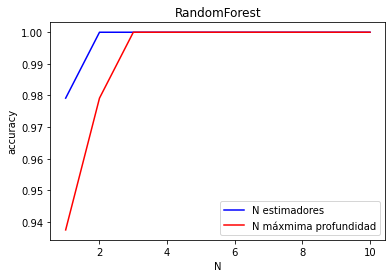

In [ ]:
#@title **Código Paso 7**

plt.plot(range(1,11), scores_ne, color="blue") # comparación entre variar los estimadores y el max depth
plt.plot(range(1,11), scores_d, color="red")
plt.legend(['N estimadores','N máxmima profundidad'])
plt.xlabel("N");plt.ylabel("accuracy")
plt.title("RandomForest")

Paso 8: mostramos algunos resultados perdedores

In [ ]:
#@title **Código Paso 8**

vector = []
estado = Estados(vector,7)

bfs = BFS1()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición

print(estadoFinal[0].mtablero()) #Perdedor
print(estadoFinal[15].mtablero()) #Perdedor
print(estadoFinal[29].mtablero()) #Perdedor

R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
None
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
▢ ▢ R ▢ ▢ ▢ ▢
▢ R ▢ ▢ ▢ ▢ ▢
None
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ R ▢ ▢
▢ R ▢ ▢ ▢ ▢ ▢
None


Paso 9: mostramos algunos resultados ganadores

In [ ]:
#@title **Código Paso 9**

vector = []
estado = Estados(vector,7)

bfs = BFS2()#Instanciando la clase
estadoFinal = bfs.anchuraPrimero(estado)#Obteniendo la Solición

print(estadoFinal[0].mtablero()) #Ganador
print(estadoFinal[9].mtablero()) #Ganador
print(estadoFinal[8].mtablero()) #Ganador

R ▢ ▢ ▢ ▢ ▢ ▢
▢ ▢ R ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ R ▢ ▢
▢ ▢ ▢ ▢ ▢ ▢ R
▢ R ▢ ▢ ▢ ▢ ▢
▢ ▢ ▢ R ▢ ▢ ▢
▢ ▢ ▢ ▢ ▢ R ▢
None
▢ R ▢ ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ ▢ R ▢
▢ ▢ R ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ ▢ ▢ R
▢ ▢ ▢ R ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ R ▢ ▢
None
▢ R ▢ ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ R ▢ ▢
▢ ▢ ▢ ▢ ▢ ▢ R
▢ ▢ ▢ R ▢ ▢ ▢
R ▢ ▢ ▢ ▢ ▢ ▢
▢ ▢ R ▢ ▢ ▢ ▢
▢ ▢ ▢ ▢ ▢ R ▢
None


# **Conclusiones**

1) Como primera conclusión logramos con éxito aplicar varios de los conceptos vistos en la asignatura de Inteligencia Artificial1 en el proyecto final  propuesto, y que posterior a implementarlo se pudo definir una gran variedad de resultados ligados a los conocimientos de la asignatura.

2) Haciendo la comparación en cuanto al tamaño de los dos dataset de los acertijos, se encontró que el dataset con mayor tamaño presenta de una forma más clara y concisa la comparación sobre los N estimadores y la profundidad de los árboles respecto al algoritmo del Random Forest Classifier.

3) Podemos concluir también que mediante la implementación de los algoritmos de búsqueda, el DFS utilizado en ambos acertijos genera un menor coste de tiempo.

4) Para el algoritmo Random Forest Classifier se concluye que al implementar una profundidad elevada, se genera una mejor clasificación en cuanto a al patrón de movimientos realizados para cada uno de los acertijos.

5) Los algoritmos de búsqueda son útiles en estos casos ya que permiten la construcción de datasets para el uso de algoritmos de clasificación.
